<h1>Text Classification For twitter Dataset</h1>

In [3]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

In [4]:
df = pd.read_csv('data/stack-overflow-data.csv')
df = df[pd.notnull(df['tags'])]
df.head(10)

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python
5,how to give alias name for my website i have ...,asp.net
6,window.open() returns null in angularjs it wo...,angularjs
7,identifying server timeout quickly in iphone ...,iphone
8,unknown method key error in rails 2.3.8 unit ...,ruby-on-rails
9,from the include how to show and hide the con...,angularjs


In [17]:
len(df['tags'].unique())

20

In [14]:
df['post'][3265]

'generate n random variables whose sum will be 1  i am trying to generate a list which will contain some numbers whose sum will be 1. the code i am trying is:    <pre><code>lista = np.zeros(3)     while(sum(lista) != 1):         lista = container(np.random.rand() for _ in range(n)) </code></pre>   however  this keeps running forever. the condition is: numbers have to be 0 or positive. is there any easy way to do this  thanks.'

In [3]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

10286120

We have over 10 million words in the data.

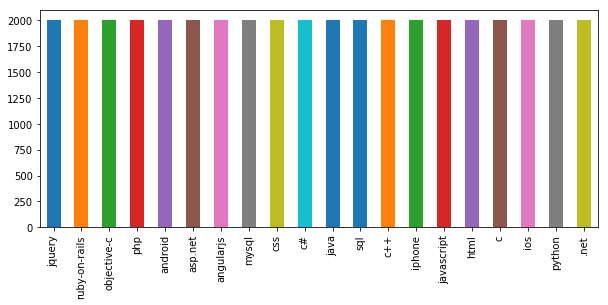

In [4]:
my_tags = ['java','html','asp.net','c#','ruby-on-rails','jquery','mysql','php','ios','javascript','python','c','css','android','iphone','sql','objective-c','c++','angularjs','.net']
plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar');


# The classes are very well balanced.

In [5]:
def print_plot(index):
    example = df[df.index == index][['post', 'tags']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

few posts and tags pairs.

In [6]:
print_plot(10)

when we need interface c# <blockquote>    <strong>possible duplicate:</strong><br>   <a href= https://stackoverflow.com/questions/240152/why-would-i-want-to-use-interfaces >why would i want to use interfaces </a>   <a href= https://stackoverflow.com/questions/9451868/why-i-need-interface >why i need interface </a>    </blockquote>     i want to know where and when to use it     for example    <pre><code>interface idemo {  // function prototype  public void show(); }  // first class using the interface class myclass1 : idemo {  public void show()  {   // function body comes here   response.write( i m in myclass );  }  }  // second class using the interface class myclass2 : idemo {  public void show()   {   // function body comes here   response.write( i m in myclass2 );   response.write( so  what  );  } </code></pre>   these two classes has the same function name with different body. this can be even achieved without interface. then why we need an interface where and when to use it
Tag:

<h2>Cleaning Up the Text </h2>

In [7]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [8]:
df['post'] = df['post'].apply(clean_text)

In [9]:
print_plot(10)

need interface c# possible duplicate would want use interfaces need interface want know use example interface idemo function prototype public void show first class using interface class myclass1 idemo public void show function body comes responsewrite myclass second class using interface class myclass2 idemo public void show function body comes responsewrite myclass2 responsewrite two classes function name different body even achieved without interface need interface use
Tag: c#


Now the Text after Cleaning

In [10]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

3424297

Now we have over 3 million words to work with.

In [11]:
X = df.post
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

 

### Naive Bayes classifier for multinomial models

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [13]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7474166666666666
               precision    recall  f1-score   support

         java       0.61      0.65      0.63       589
         html       0.94      0.83      0.88       661
      asp.net       0.92      0.92      0.92       606
           c#       0.75      0.74      0.74       613
ruby-on-rails       0.73      0.87      0.79       601
       jquery       0.70      0.53      0.61       585
        mysql       0.82      0.72      0.76       621
          php       0.68      0.88      0.77       587
          ios       0.56      0.66      0.61       560
   javascript       0.64      0.62      0.63       611
       python       0.66      0.61      0.63       593
            c       0.74      0.81      0.78       581
          css       0.81      0.58      0.67       608
      android       0.72      0.79      0.75       593
       iphone       0.67      0.82      0.74       592
          sql       0.71      0.66      0.68       597
  objective-c       0.82      0.77  

### Linear support vector machine

In [14]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=0, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

C:\Users\smvdi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ndom_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [15]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7908333333333334
               precision    recall  f1-score   support

         java       0.75      0.67      0.70       589
         html       0.85      0.93      0.89       661
      asp.net       0.91      0.96      0.93       606
           c#       0.80      0.80      0.80       613
ruby-on-rails       0.73      0.87      0.79       601
       jquery       0.76      0.42      0.54       585
        mysql       0.84      0.65      0.73       621
          php       0.69      0.93      0.79       587
          ios       0.79      0.60      0.68       560
   javascript       0.78      0.59      0.67       611
       python       0.71      0.67      0.69       593
            c       0.78      0.87      0.82       581
          css       0.80      0.78      0.79       608
      android       0.84      0.83      0.84       593
       iphone       0.85      0.82      0.84       592
          sql       0.70      0.71      0.71       597
  objective-c       0.83      0.90  

### Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

C:\Users\smvdi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\smvdi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [17]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7801666666666667
               precision    recall  f1-score   support

         java       0.70      0.64      0.67       589
         html       0.92      0.89      0.91       661
      asp.net       0.97      0.94      0.96       606
           c#       0.79      0.76      0.77       613
ruby-on-rails       0.78      0.85      0.81       601
       jquery       0.59      0.61      0.60       585
        mysql       0.78      0.71      0.75       621
          php       0.76      0.84      0.80       587
          ios       0.65      0.70      0.67       560
   javascript       0.65      0.62      0.63       611
       python       0.64      0.65      0.64       593
            c       0.82      0.81      0.81       581
          css       0.80      0.75      0.77       608
      android       0.83      0.85      0.84       593
       iphone       0.80      0.79      0.80       592
          sql       0.68      0.66      0.67       597
  objective-c       0.83      0.84  

<h2>Naive Bays</h2>

In [18]:
from sklearn.naive_bayes import MultinomialNB

naive = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB()),
               ])
naive.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [19]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7801666666666667
               precision    recall  f1-score   support

         java       0.70      0.64      0.67       589
         html       0.92      0.89      0.91       661
      asp.net       0.97      0.94      0.96       606
           c#       0.79      0.76      0.77       613
ruby-on-rails       0.78      0.85      0.81       601
       jquery       0.59      0.61      0.60       585
        mysql       0.78      0.71      0.75       621
          php       0.76      0.84      0.80       587
          ios       0.65      0.70      0.67       560
   javascript       0.65      0.62      0.63       611
       python       0.64      0.65      0.64       593
            c       0.82      0.81      0.81       581
          css       0.80      0.75      0.77       608
      android       0.83      0.85      0.84       593
       iphone       0.80      0.79      0.80       592
          sql       0.68      0.66      0.67       597
  objective-c       0.83      0.84  

<h2>K Nearest N</h2>

In [20]:
from sklearn.neighbors import KNeighborsClassifier

Kneis = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski')),
               ])
Kneis.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform'))])

In [21]:
%%time

y_pred = Kneis.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.6404166666666666
               precision    recall  f1-score   support

         java       0.65      0.58      0.61       589
         html       0.84      0.75      0.79       661
      asp.net       0.85      0.63      0.73       606
           c#       0.68      0.65      0.67       613
ruby-on-rails       0.57      0.83      0.68       601
       jquery       0.65      0.34      0.45       585
        mysql       0.72      0.55      0.63       621
          php       0.54      0.79      0.64       587
          ios       0.41      0.59      0.48       560
   javascript       0.63      0.51      0.56       611
       python       0.57      0.62      0.59       593
            c       0.62      0.72      0.67       581
          css       0.69      0.47      0.56       608
      android       0.50      0.67      0.57       593
       iphone       0.60      0.70      0.64       592
          sql       0.64      0.54      0.59       597
  objective-c       0.67      0.68  

In [27]:
from sklearn.tree import DecisionTreeClassifier

Decision = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)),
               ])
Decision.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...         min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])

In [28]:
%%time

y_pred = Decision.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.6603333333333333
               precision    recall  f1-score   support

         java       0.55      0.55      0.55       589
         html       0.81      0.75      0.78       661
      asp.net       0.85      0.83      0.84       606
           c#       0.63      0.61      0.62       613
ruby-on-rails       0.66      0.68      0.67       601
       jquery       0.32      0.37      0.35       585
        mysql       0.57      0.51      0.54       621
          php       0.67      0.73      0.70       587
          ios       0.51      0.55      0.53       560
   javascript       0.52      0.51      0.52       611
       python       0.52      0.51      0.52       593
            c       0.72      0.69      0.71       581
          css       0.65      0.71      0.68       608
      android       0.79      0.72      0.75       593
       iphone       0.79      0.79      0.79       592
          sql       0.53      0.51      0.52       597
  objective-c       0.74      0.72  

<h2>Random Forest</h2>

In [31]:
from sklearn.ensemble import RandomForestClassifier

random = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=50,random_state=0,criterion='entropy')),
               ])
random.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...imators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [32]:
%%time

y_pred = random.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7410833333333333
               precision    recall  f1-score   support

         java       0.59      0.68      0.63       589
         html       0.89      0.83      0.86       661
      asp.net       0.95      0.92      0.93       606
           c#       0.74      0.71      0.72       613
ruby-on-rails       0.72      0.83      0.77       601
       jquery       0.56      0.47      0.51       585
        mysql       0.79      0.56      0.66       621
          php       0.64      0.86      0.73       587
          ios       0.61      0.65      0.63       560
   javascript       0.67      0.56      0.61       611
       python       0.56      0.66      0.60       593
            c       0.80      0.75      0.77       581
          css       0.77      0.70      0.74       608
      android       0.76      0.79      0.78       593
       iphone       0.76      0.82      0.79       592
          sql       0.67      0.64      0.66       597
  objective-c       0.85      0.74  